<a href="https://colab.research.google.com/github/soumya0422/FitPulse-Health-Anomaly-Detection-from-Fitness-Devices-/blob/main/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters
from sklearn.feature_selection import VarianceThreshold
import os

In [35]:
df = pd.read_csv('/content/drive/MyDrive/Cleaned_Data.csv')
df["Time"] = pd.to_datetime(df["Time"])


In [36]:
df

,Id,Time,heart_rate,Steps_per_minute,Sleep_per_minute
0,2022484408,2016-04-12 07:21:00,101.600000,14.116667,0.0
1,2022484408,2016-04-12 07:22:00,87.888889,14.116667,0.0
2,2022484408,2016-04-12 07:23:00,58.000000,14.116667,0.0
3,2022484408,2016-04-12 07:24:00,58.000000,14.116667,0.0
4,2022484408,2016-04-12 07:25:00,56.777778,14.116667,0.0
...,...,...,...,...,...
334625,8877689391,2016-05-12 14:40:00,56.222222,7.616667,0.0
334626,8877689391,2016-05-12 14:41:00,57.857143,7.616667,0.0
334627,8877689391,2016-05-12 14:42:00,56.000000,7.616667,0.0
334628,8877689391,2016-05-12 14:43:00,57.500000,7.616667,0.0


In [37]:
user_ids = df["Id"].unique()[:5]
df = df[df["Id"].isin(user_ids)]
df = df.groupby("Id").head(600)

In [38]:
WINDOW_SIZE = 10    # number of rows per window
STEP_SIZE = 10      # overlap

rows = []
window_id = 0

for start in range(0, len(df) - WINDOW_SIZE, STEP_SIZE):
    window = df.iloc[start:start + WINDOW_SIZE].copy()
    window["id"] = window_id
    rows.append(window)
    window_id += 1

df_windowed = pd.concat(rows)


In [39]:

ts_data = df[["Id", "Time", "heart_rate"]]
ts_data.columns = ["id", "time", "value"]
ts_data.replace([np.inf, -np.inf], np.nan, inplace=True)
ts_data.dropna(inplace=True)

/tmp/ipython-input-2229869517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipython-input-2229869517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data.dropna(inplace=True)


In [40]:
from tsfresh import extract_features

features = extract_features(
    ts_data,
    column_id="id",
    column_sort="time"
)

features = features.fillna(0)
print("Extracted features shape:", features.shape)

Feature Extraction: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

Extracted features shape: (5, 783)


In [41]:
df['Id'].value_counts()

,count
Id,
2022484408,600
2347167796,600
4020332650,600
4388161847,600
2026352035,424


In [42]:
features

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
2022484408,1.0,0.0,0.0,1.0,44330.942929,3.442803e+06,3.935316,-0.028428,0.011315,66.900000,...,0.136002,0.136002,0.787479,1.682151,2.875184,4.160348,5.284183,5.975956,0.0,124.131236
2026352035,1.0,0.0,0.0,1.0,39231.721898,3.698382e+06,2.860835,0.050827,0.000039,93.937500,...,0.170467,0.215617,1.014777,1.634162,2.687785,3.850217,4.800018,5.449852,0.0,118.477041
2347167796,1.0,0.0,0.0,1.0,51131.736616,4.523937e+06,4.497332,-0.076405,0.002393,81.200000,...,0.337797,0.587132,1.538885,1.656922,2.831938,4.099676,5.191171,5.864863,0.0,149.476809
4020332650,1.0,0.0,0.0,1.0,41959.972363,3.014465e+06,2.539222,0.034502,-0.004729,64.590323,...,0.045395,0.155665,0.978068,1.684796,2.891062,4.209603,5.324980,5.931009,0.0,100.825691
4388161847,1.0,0.0,1.0,1.0,36790.787157,2.373851e+06,3.304660,-0.008904,0.002500,56.366667,...,0.125256,0.170467,0.889582,1.768148,3.112351,4.589029,5.786720,6.272668,0.0,116.391156


In [43]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(
    n_estimators=100,
    contamination=0.05, #5%
    random_state=42
)

features_filled = features.fillna(0)

anomaly_labels = model.fit_predict(features_filled)

features['anomaly'] = anomaly_labels

In [44]:
features['anomaly'].value_counts()

,count
anomaly,
1,4
-1,1


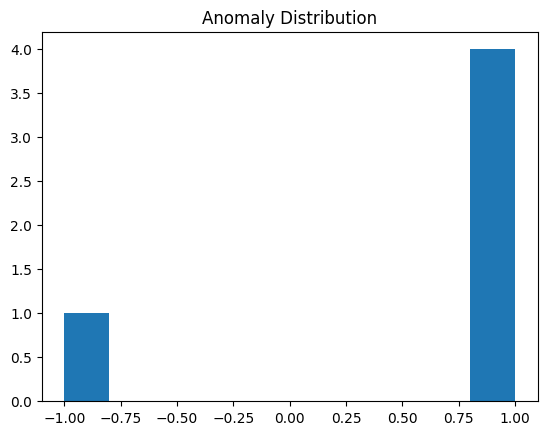

In [45]:
import matplotlib.pyplot as plt

plt.hist(anomaly_labels)
plt.title("Anomaly Distribution")
plt.show()

In [46]:
df.columns

Index(['Id', 'Time', 'heart_rate', 'Steps_per_minute', 'Sleep_per_minute'], dtype='object')

In [48]:
import numpy as np

sensor_columns = ['heart_rate', 'Steps_per_minute', 'Sleep_per_minute']

long_df = df.melt(
    id_vars=['Id', 'Time'],
    value_vars=sensor_columns,
    var_name='kind',
    value_name='value'
)

# Rename columns for TSFresh
long_df.rename(columns={
    'Id': 'id',
    'Time': 'time'
}, inplace=True)

# Clean data
long_df.replace([np.inf, -np.inf], np.nan, inplace=True)
long_df.dropna(inplace=True)

long_df.head()


,id,time,kind,value
0,2022484408,2016-04-12 07:21:00,heart_rate,101.600000
1,2022484408,2016-04-12 07:22:00,heart_rate,87.888889
2,2022484408,2016-04-12 07:23:00,heart_rate,58.000000
3,2022484408,2016-04-12 07:24:00,heart_rate,58.000000
4,2022484408,2016-04-12 07:25:00,heart_rate,56.777778


In [49]:
from tsfresh import extract_features

features = extract_features(
    long_df,
    column_id='id',
    column_sort='time',
    column_kind='kind',
    column_value='value'
)

features = features.fillna(0)
features.head()

Feature Extraction: 100%|██████████| 15/15 [00:08<00:00,  1.70it/s]


,Sleep_per_minute__variance_larger_than_standard_deviation,Sleep_per_minute__has_duplicate_max,Sleep_per_minute__has_duplicate_min,Sleep_per_minute__has_duplicate,Sleep_per_minute__sum_values,Sleep_per_minute__abs_energy,Sleep_per_minute__mean_abs_change,Sleep_per_minute__mean_change,Sleep_per_minute__mean_second_derivative_central,Sleep_per_minute__median,...,heart_rate__fourier_entropy__bins_5,heart_rate__fourier_entropy__bins_10,heart_rate__fourier_entropy__bins_100,heart_rate__permutation_entropy__dimension_3__tau_1,heart_rate__permutation_entropy__dimension_4__tau_1,heart_rate__permutation_entropy__dimension_5__tau_1,heart_rate__permutation_entropy__dimension_6__tau_1,heart_rate__permutation_entropy__dimension_7__tau_1,heart_rate__query_similarity_count__query_None__threshold_0.0,heart_rate__mean_n_absolute_max__number_of_maxima_7
2022484408,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.136002,0.136002,0.787479,1.682151,2.875184,4.160348,5.284183,5.975956,0.0,124.131236
2026352035,0.0,1.0,1.0,1.0,151.002778,53.924481,0.000154,0.000154,0.0,0.354861,...,0.170467,0.215617,1.014777,1.634162,2.687785,3.850217,4.800018,5.449852,0.0,118.477041
2347167796,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.337797,0.587132,1.538885,1.656922,2.831938,4.099676,5.191171,5.864863,0.0,149.476809
4020332650,0.0,1.0,1.0,1.0,208.750000,72.627604,0.000000,0.000000,0.0,0.347917,...,0.045395,0.155665,0.978068,1.684796,2.891062,4.209603,5.324980,5.931009,0.0,100.825691
4388161847,0.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.125256,0.170467,0.889582,1.768148,3.112351,4.589029,5.786720,6.272668,0.0,116.391156


In [50]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05, random_state=42)
labels = model.fit_predict(features)

features['anomaly'] = labels

In [52]:
df['anomaly'] = 1

for wid in features.query("anomaly == -1").index:
    df.loc[wid:wid+WINDOW_SIZE-1, 'anomaly'] = -1

In [53]:
df['anomaly'].value_counts()

,count
anomaly,
1,2824


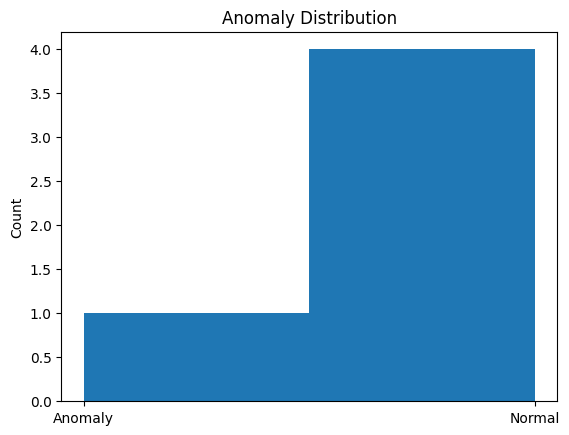

In [54]:
import matplotlib.pyplot as plt

plt.hist(anomaly_labels, bins=2)
plt.xticks([-1, 1], ['Anomaly', 'Normal'])
plt.title("Anomaly Distribution")
plt.ylabel("Count")
plt.show()

In [55]:
import plotly.express as px
import pandas as pd

df_plot = pd.DataFrame({ "Anomaly Label": anomaly_labels })

fig = px.histogram(
    df_plot,
    x="Anomaly Label",
    nbins=2,
    title="Anomaly Distribution"
)

# Replace -1 / 1 with readable labels
fig.update_xaxes(
    tickvals=[-1, 1],
    ticktext=["Anomaly", "Normal"]
)

fig.update_yaxes(title="Count")

fig.show()

In [57]:
import numpy as np

def clean_for_tsfresh(input_df):
    # Select relevant columns and rename them for tsfresh
    cleaned_df = input_df[["Id", "Time", "heart_rate"]].copy()
    cleaned_df.columns = ["id", "time", "value"]

    # Handle infinite and NaN values
    cleaned_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    cleaned_df.dropna(inplace=True)

    return cleaned_df

df_clean = clean_for_tsfresh(df)
print("\nCleaned DataFrame:")
print(df_clean)


Cleaned DataFrame:
               id                time       value
0      2022484408 2016-04-12 07:21:00  101.600000
1      2022484408 2016-04-12 07:22:00   87.888889
2      2022484408 2016-04-12 07:23:00   58.000000
3      2022484408 2016-04-12 07:24:00   58.000000
4      2022484408 2016-04-12 07:25:00   56.777778
...           ...                 ...         ...
55819  4388161847 2016-04-13 09:55:00   54.833333
55820  4388161847 2016-04-13 09:56:00   56.333333
55821  4388161847 2016-04-13 09:57:00   57.666667
55822  4388161847 2016-04-13 09:58:00   57.200000
55823  4388161847 2016-04-13 09:59:00   56.000000

[2824 rows x 3 columns]


In [59]:
from google.colab import files

features.to_csv("tsfresh_features.csv")
files.download("tsfresh_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>